# Tugas Besar Probabilitas dan Statistika
### Analisis Data dan Tes Hipotesis

<a href="https://github.com/maikeljh">Michael Jonathan Halim - 13521124</a>  
<a href="https://github.com/alifioditya">Enrique Alifio Ditya - 13521142</a>

# Import Necessary Libraries

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy
from math import sqrt
from scipy.stats import t, f

# Import Dataset

In [72]:
df = pd.read_csv("../data/anggur.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,5.90,0.4451,0.1813,2.049401,0.070574,16.593818,42.27,0.9982,3.27,0.71,8.64,7
1,8.40,0.5768,0.2099,3.109590,0.101681,22.555519,16.01,0.9960,3.35,0.57,10.03,8
2,7.54,0.5918,0.3248,3.673744,0.072416,9.316866,35.52,0.9990,3.31,0.64,9.23,8
3,5.39,0.4201,0.3131,3.371815,0.072755,18.212300,41.97,0.9945,3.34,0.55,14.07,9
4,6.51,0.5675,0.1940,4.404723,0.066379,9.360591,46.27,0.9925,3.27,0.45,11.49,8
...,...,...,...,...,...,...,...,...,...,...,...,...
995,7.96,0.6046,0.2662,1.592048,0.057555,14.892445,44.61,0.9975,3.35,0.54,10.41,8
996,8.48,0.4080,0.2227,0.681955,0.051627,23.548965,25.83,0.9972,3.41,0.46,9.91,8
997,6.11,0.4841,0.3720,2.377267,0.042806,21.624585,48.75,0.9928,3.23,0.55,9.94,7
998,7.76,0.3590,0.3208,4.294486,0.098276,12.746186,44.53,0.9952,3.30,0.66,9.76,8


# Exploratory Data Analysis

For a full and thorough breakdown of the dataset, you can open the `EDA.html` file in the `public` folder.

## Descriptive Statistics

### Missing Values

In [73]:
missing_values = df.isnull().sum(axis=0)
nan_cols = missing_values[missing_values > 0]
print("Missing Data:", len(nan_cols))

Missing Data: 0


### Feature Information

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1000 non-null   float64
 1   volatile acidity      1000 non-null   float64
 2   citric acid           1000 non-null   float64
 3   residual sugar        1000 non-null   float64
 4   chlorides             1000 non-null   float64
 5   free sulfur dioxide   1000 non-null   float64
 6   total sulfur dioxide  1000 non-null   float64
 7   density               1000 non-null   float64
 8   pH                    1000 non-null   float64
 9   sulphates             1000 non-null   float64
 10  alcohol               1000 non-null   float64
 11  quality               1000 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 93.9 KB


Based on the information above, all features are of numeric type

### Statistical Summary

In [75]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,7.152530,0.520839,0.270517,2.567104,0.081195,14.907679,40.290150,0.995925,3.303610,0.598390,10.592280,7.958000
std,1.201598,0.095848,0.049098,0.987915,0.020111,4.888100,9.965767,0.002020,0.104875,0.100819,1.510706,0.902802
min,3.320000,0.139900,0.116700,0.032555,0.015122,0.194679,3.150000,0.988800,2.970000,0.290000,6.030000,5.000000
25%,6.377500,0.456100,0.237800,1.896330,0.066574,11.426717,33.785000,0.994600,3.230000,0.530000,9.560000,7.000000
50%,7.150000,0.524850,0.272200,2.519430,0.082167,14.860346,40.190000,0.996000,3.300000,0.595000,10.610000,8.000000
75%,8.000000,0.585375,0.302325,3.220873,0.095312,18.313098,47.022500,0.997200,3.370000,0.670000,11.622500,9.000000
max,11.490000,0.805100,0.409600,5.550755,0.140758,27.462525,69.960000,1.002600,3.710000,0.960000,15.020000,10.000000


### Unique Values

In [76]:
df.nunique()

fixed acidity            417
volatile acidity         879
citric acid              769
residual sugar          1000
chlorides               1000
free sulfur dioxide     1000
total sulfur dioxide     881
density                  107
pH                        61
sulphates                 60
alcohol                  490
quality                    6
dtype: int64

### Skewness

In [77]:
df.skew()

fixed acidity          -0.028879
volatile acidity       -0.197699
citric acid            -0.045576
residual sugar          0.132638
chlorides              -0.051319
free sulfur dioxide     0.007130
total sulfur dioxide   -0.024060
density                -0.076883
pH                      0.147673
sulphates               0.149199
alcohol                -0.018991
quality                -0.089054
dtype: float64

### Kurtosis

In [78]:
df.kurtosis()

fixed acidity          -0.019292
volatile acidity        0.161853
citric acid            -0.104679
residual sugar         -0.042980
chlorides              -0.246508
free sulfur dioxide    -0.364964
total sulfur dioxide    0.063950
density                 0.016366
pH                      0.080910
sulphates               0.064819
alcohol                -0.131732
quality                 0.108291
dtype: float64

### Quartiles and Interquartile Range

In [79]:
# Examine interquartile range
def iqr(data, col):
    print("===============================")
    print("Column:", col)
    # Determine IQR for column
    col_values = data[col].values
    q25, q75 = np.percentile(col_values, 25), np.percentile(col_values, 75)
    print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
    iqr = q75 - q25
    print('IQR: {}'.format(iqr))
    print()

    # Determine the cut off (IQR * 1.5)
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    print('Cut Off: {}'.format(cut_off))
    print('Lower bound: {}'.format(lower))
    print('Upper bound: {}'.format(upper))
    print("===============================")
    print()

In [80]:
for col in df.columns:
    iqr(df, col)

Column: fixed acidity
Quartile 25: 6.3774999999999995 | Quartile 75: 8.0
IQR: 1.6225000000000005

Cut Off: 2.4337500000000007
Lower bound: 3.9437499999999988
Upper bound: 10.43375

Column: volatile acidity
Quartile 25: 0.4561 | Quartile 75: 0.585375
IQR: 0.12927499999999997

Cut Off: 0.19391249999999996
Lower bound: 0.2621875
Upper bound: 0.7792874999999999

Column: citric acid
Quartile 25: 0.2378 | Quartile 75: 0.302325
IQR: 0.064525

Cut Off: 0.0967875
Lower bound: 0.1410125
Upper bound: 0.3991125

Column: residual sugar
Quartile 25: 1.896329943488683 | Quartile 75: 3.220873482829786
IQR: 1.3245435393411031

Cut Off: 1.9868153090116547
Lower bound: -0.09048536552297182
Upper bound: 5.2076887918414405

Column: chlorides
Quartile 25: 0.06657363190977357 | Quartile 75: 0.09531150148556258
IQR: 0.028737869575789013

Cut Off: 0.04310680436368352
Lower bound: 0.02346682754609005
Upper bound: 0.1384183058492461

Column: free sulfur dioxide
Quartile 25: 11.426716949457617 | Quartile 75: 18.3

## Univariate Analysis

### Distribution

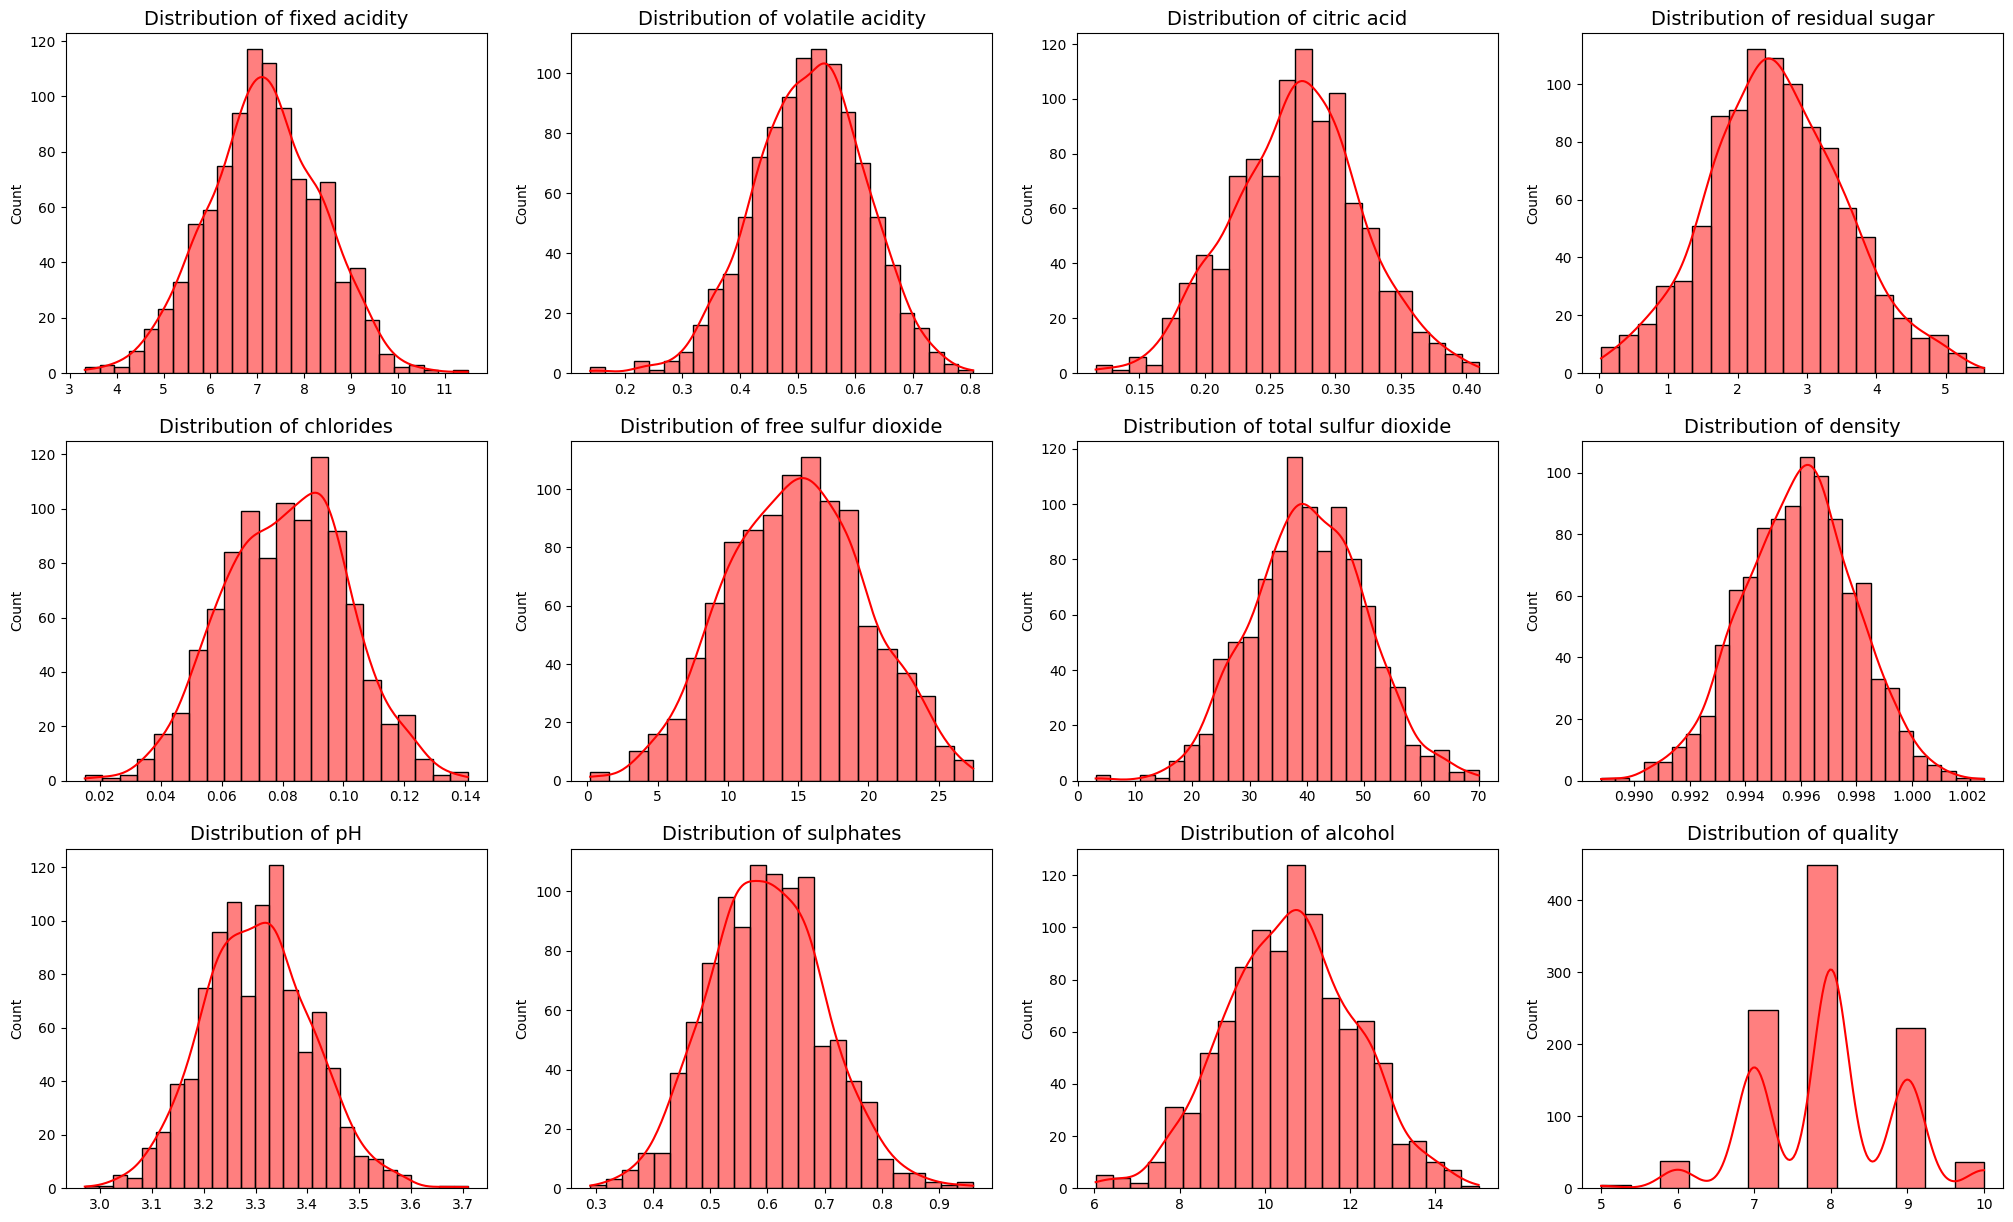

In [81]:
# Examine the distribution of each columns
# Create the subplot grid
fig, ax = plt.subplots(3, 4, figsize=(25, 15))

# Loop through the numerical columns
for i, col in enumerate(df.columns):
    sns.histplot(df[col].values, ax=ax[i // 4][i % 4], color='r', kde=True)
    ax[i // 4][i % 4].set_title(f'Distribution of {col}', fontsize=14)

plt.show()

### `Explaination Distributions`

Determine the alpha to reject that the attribute is normally distributed

In [82]:
alpha = 0.05

`Fixed Acidity`

In [83]:
statistic_value, p_value = scipy.stats.normaltest(df['fixed acidity'])

if(p_value < alpha):
    print("Fixed Acidity is not normally distributed")
else:
    print("Fixed Acidity is normally distributed")

Fixed Acidity is normally distributed


`Volatile Acidity`

In [84]:
statistic_value, p_value = scipy.stats.normaltest(df['volatile acidity'])

if(p_value < alpha):
    print("Volatile Acidity is not normally distributed")
else:
    print("Volatile Acidity is normally distributed")

Volatile Acidity is not normally distributed


`Citric Acid`

In [85]:
statistic_value, p_value = scipy.stats.normaltest(df['citric acid'])

if(p_value < alpha):
    print("Citric Acid is not normally distributed")
else:
    print("Citric Acid is normally distributed")

Citric Acid is normally distributed


`Residual Sugar`

In [86]:
statistic_value, p_value = scipy.stats.normaltest(df['residual sugar'])

if(p_value < alpha):
    print("Residual Sugar is not normally distributed")
else:
    print("Residual Sugar is normally distributed")

Residual Sugar is normally distributed


`Chlorides`

In [87]:
statistic_value, p_value = scipy.stats.normaltest(df['chlorides'])

if(p_value < alpha):
    print("Chlorides is not normally distributed")
else:
    print("Chlorides is normally distributed")

Chlorides is normally distributed


`Free Sulfur Dioxide`

In [88]:
statistic_value, p_value = scipy.stats.normaltest(df['free sulfur dioxide'])

if(p_value < alpha):
    print("Free Sulfur Dioxide is not normally distributed")
else:
    print("Free Sulfur Dioxide is normally distributed")

Free Sulfur Dioxide is not normally distributed


`Total Sulfur Dioxide`

In [89]:
statistic_value, p_value = scipy.stats.normaltest(df['total sulfur dioxide'])

if(p_value < alpha):
    print("Total Sulfur Dioxide is not normally distributed")
else:
    print("Total Sulfur Dioxide is normally distributed")

Total Sulfur Dioxide is normally distributed


`Density`

In [90]:
statistic_value, p_value = scipy.stats.normaltest(df['density'])

if(p_value < alpha):
    print("Density is not normally distributed")
else:
    print("Density is normally distributed")

Density is normally distributed


`pH`

In [91]:
statistic_value, p_value = scipy.stats.normaltest(df['pH'])

if(p_value < alpha):
    print("pH is not normally distributed")
else:
    print("pH is normally distributed")

pH is normally distributed


`Sulphates`

In [92]:
statistic_value, p_value = scipy.stats.normaltest(df['sulphates'])

if(p_value < alpha):
    print("Sulphates is not normally distributed")
else:
    print("Sulphates is normally distributed")

Sulphates is normally distributed


`Alcohol`

In [93]:
statistic_value, p_value = scipy.stats.normaltest(df['alcohol'])

if(p_value < alpha):
    print("Alcohol is not normally distributed")
else:
    print("Alcohol is normally distributed")

Alcohol is normally distributed


`Quality`

In [94]:
statistic_value, p_value = scipy.stats.normaltest(df['quality'])

if(p_value < alpha):
    print("Quality is not normally distributed")
else:
    print("Quality is normally distributed")

Quality is normally distributed


### Boxplot

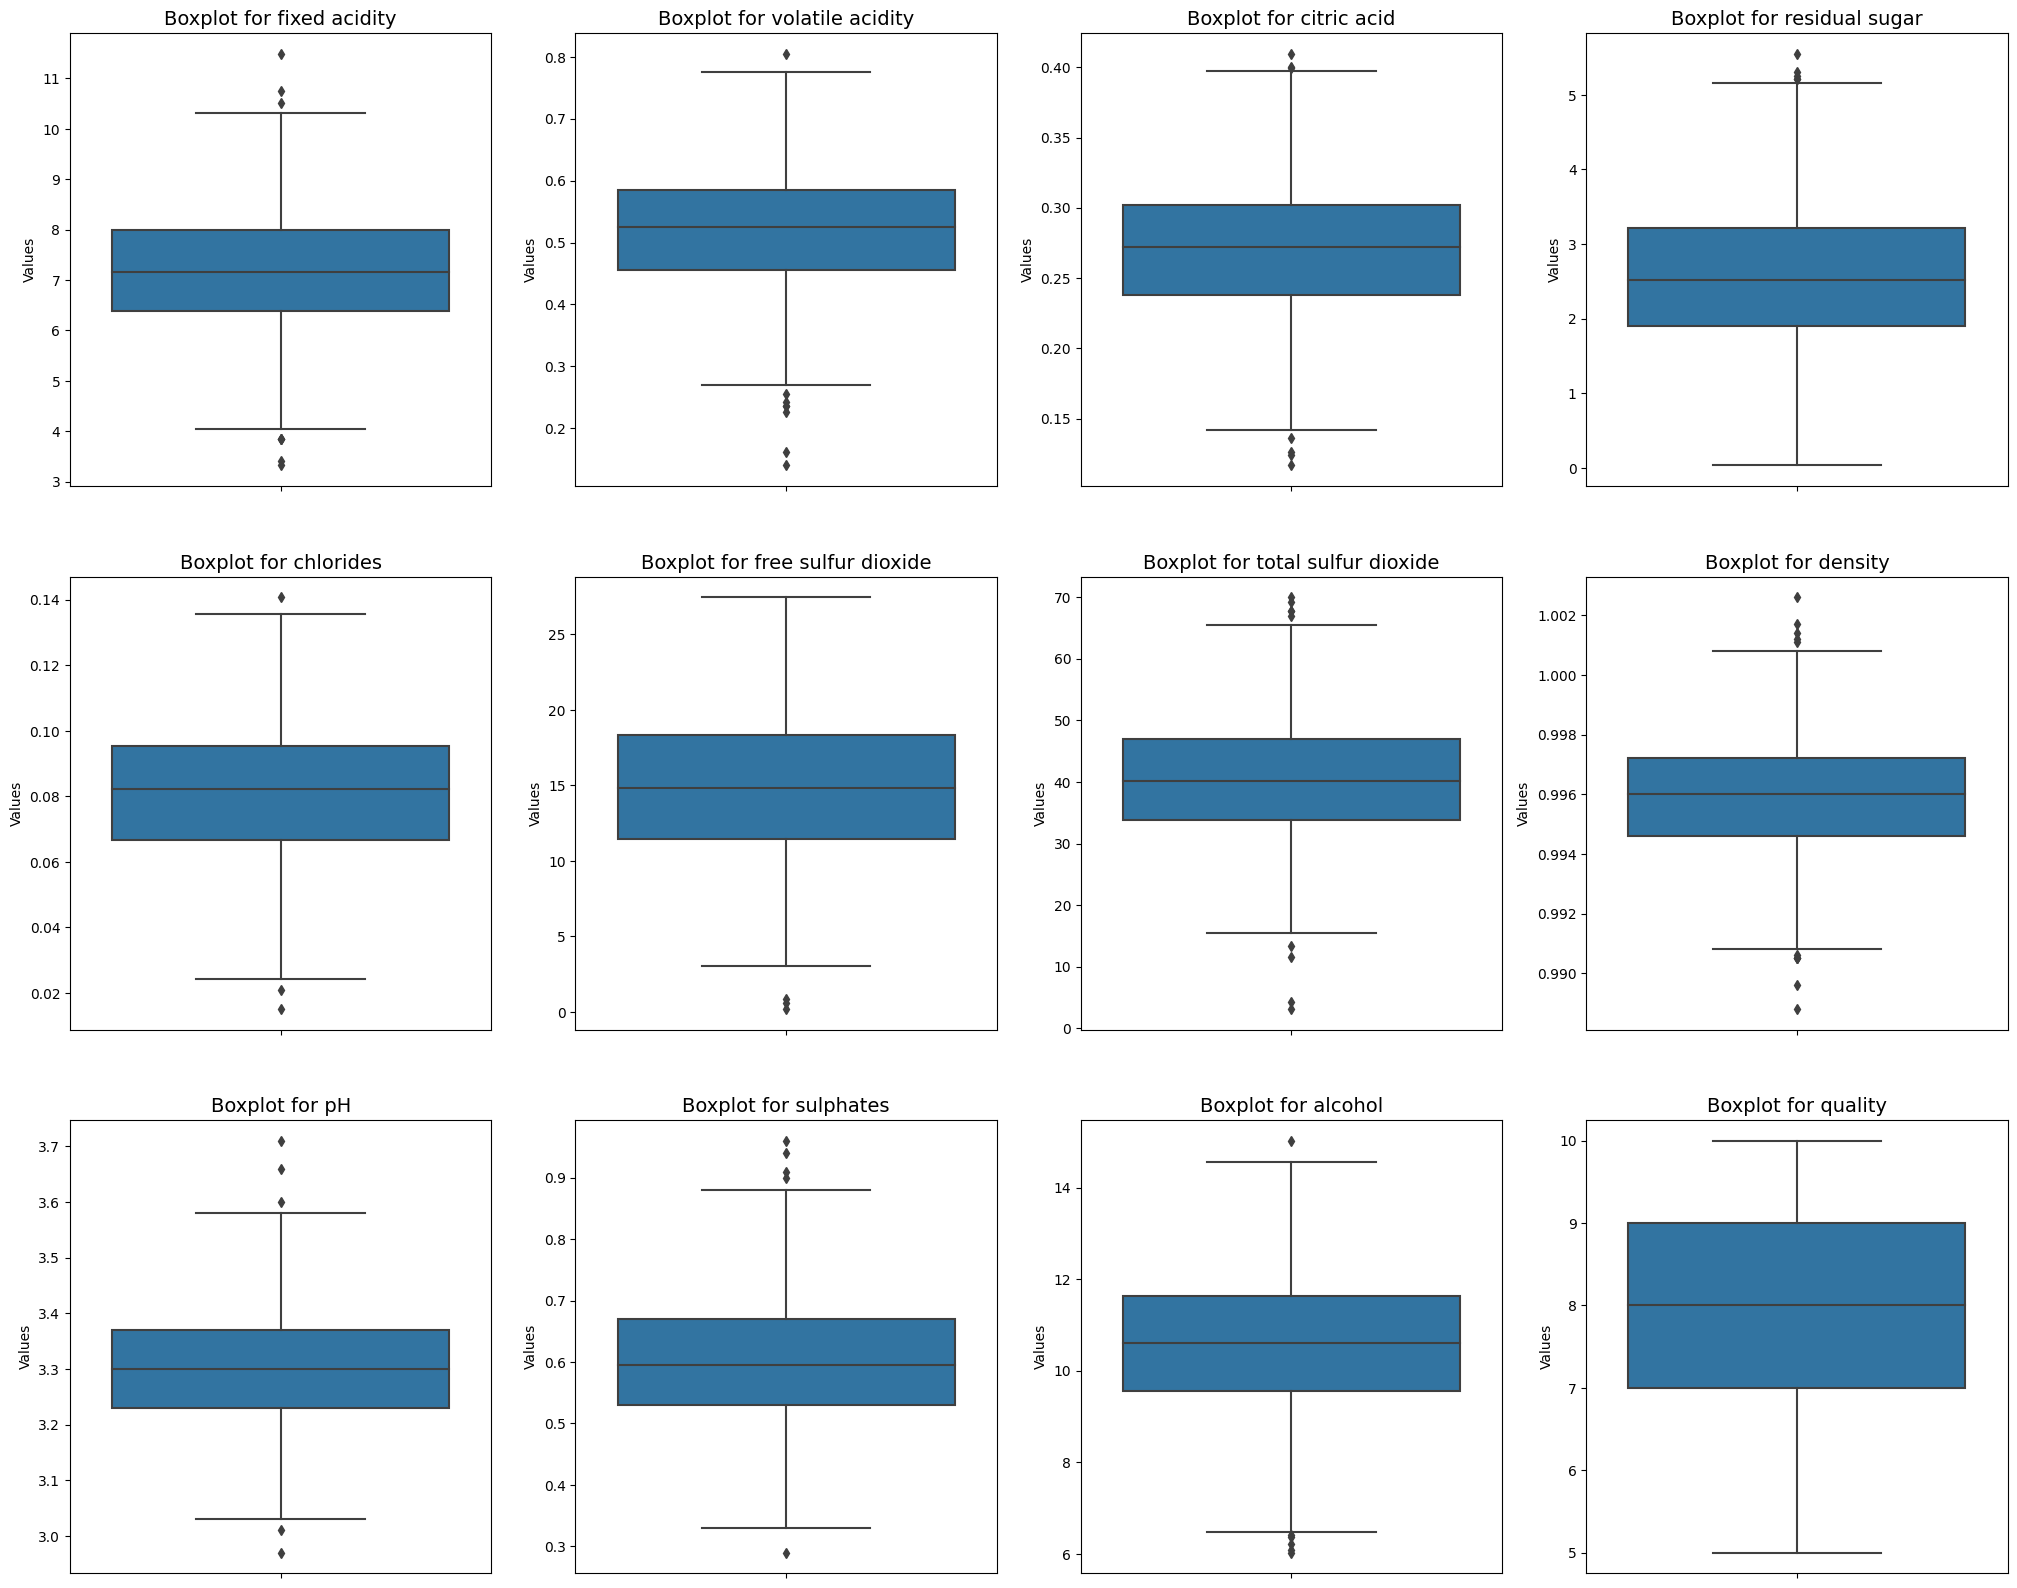

In [95]:
# Examine the boxplot of each columns
# Create the subplot grid
fig, ax = plt.subplots(3, 4, figsize=(25, 20))

# Loop through the numerical columns
for i, col in enumerate(df.columns):
    sns.boxplot(y=df[col].values, ax=ax[i // 4][i % 4])
    ax[i // 4][i % 4].set_title(f'Boxplot for {col}', fontsize=14)
    ax[i // 4][i % 4].set_ylabel('Values')
    ax[i // 4][i % 4].set_xticklabels('')

plt.show()

`Explain Boxplots Here`

### Proportion of the Target Variable

In [96]:
# Plot class distribution
def plot_classes(y):
    counts = y.value_counts().sort_index()
    counts = counts.rename_axis("Quality").reset_index(name="Count")
    fig = px.pie(counts, values="Quality", names="Count" ,title="Quality Proportion Percentage", template="seaborn")
    fig.update_traces(textposition="inside", textinfo="value+percent+label")
    fig.show()
    print(counts)
    print()

In [97]:
plot_classes(df['quality'])

   Quality  Count
0        5      5
1        6     38
2        7    248
3        8    449
4        9    223
5       10     37



## Multivariate Analysis

### Feature Correlation

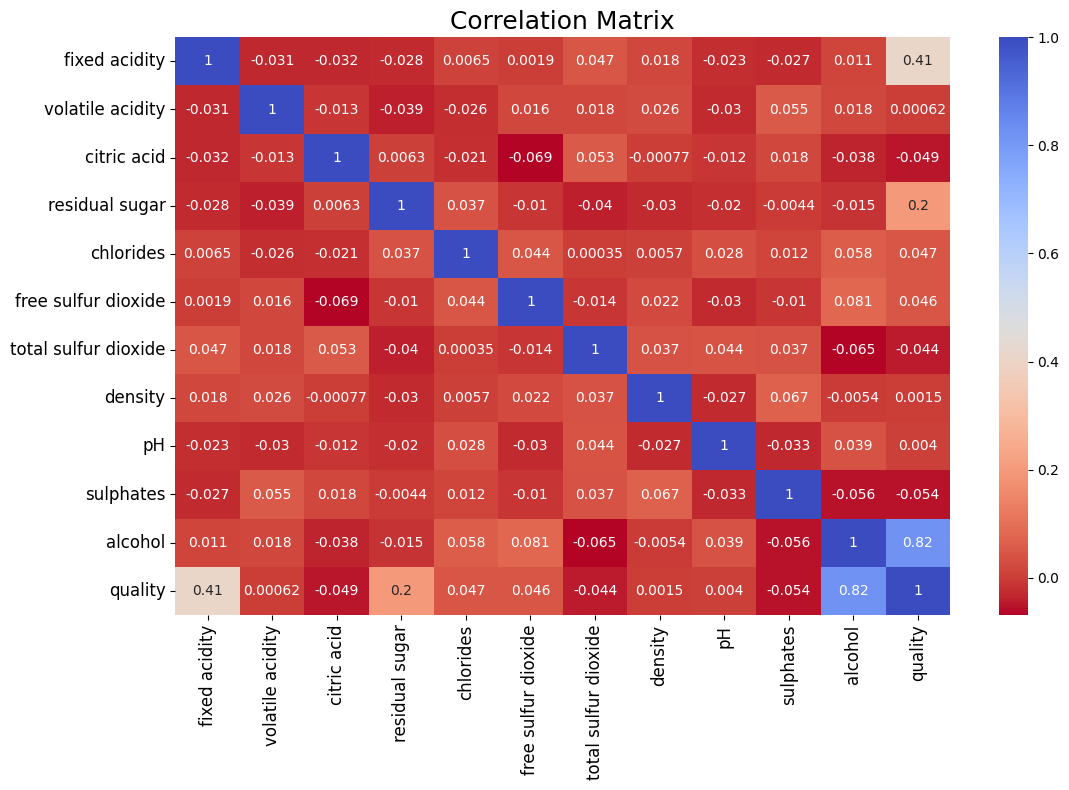

In [98]:
plt.figure(figsize = (12.5,7.5))
plt.title("Correlation Matrix", fontsize = 18)
sns.heatmap(df.corr(), cmap = 'coolwarm_r', annot = True)
plt.xticks(fontsize=12, rotation = 90)
plt.yticks(fontsize=12, rotation = 0)
plt.show()

### Alcohol vs Quality

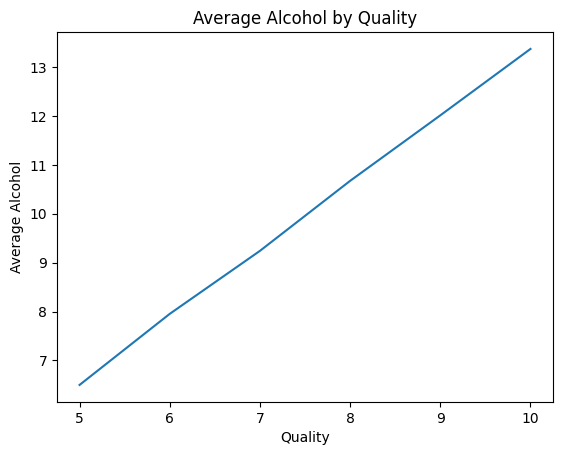

In [99]:
# Group the data by the 'quality' column and calculate the mean of 'alcohol'
alcohol_by_quality = df.groupby('quality')['alcohol'].mean()

# Plot a line chart of the average 'alcohol' value for each 'quality' level
alcohol_by_quality.plot(kind='line', x='quality', y='alcohol')
plt.xlabel('Quality')
plt.ylabel('Average Alcohol')
plt.title('Average Alcohol by Quality')
plt.show()

### Fixed Acidity vs Quality

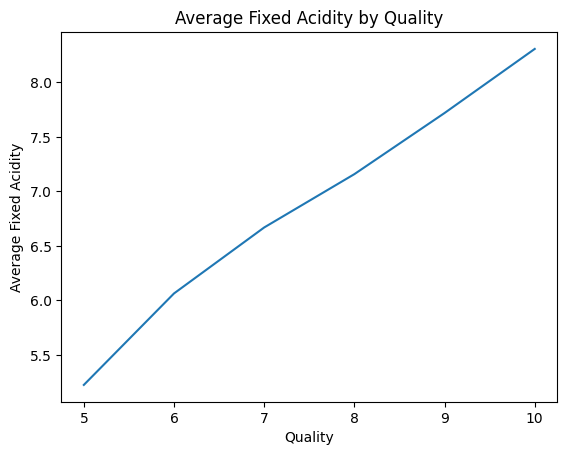

In [100]:
# Group the data by the 'quality' column and calculate the mean of 'fixed acidity'
fixed_acidity_by_quality = df.groupby('quality')['fixed acidity'].mean()

# Plot a line chart of the average 'fixed acidity' value for each 'quality' level
fixed_acidity_by_quality.plot(kind='line', x='quality', y='fixed acidity')
plt.xlabel('Quality')
plt.ylabel('Average Fixed Acidity')
plt.title('Average Fixed Acidity by Quality')
plt.show()

### Residual Sugar vs Alcohol

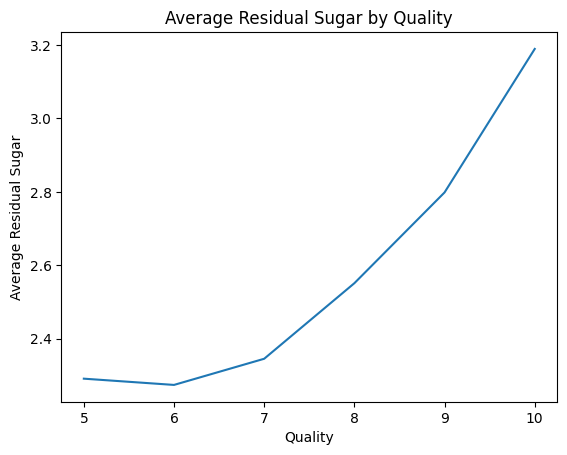

In [101]:
# Group the data by the 'quality' column and calculate the mean of 'residual sugar'
residual_sugar_by_quality = df.groupby('quality')['residual sugar'].mean()

# Plot a line chart of the average 'residual sugar' value for each 'quality' level
residual_sugar_by_quality.plot(kind='line', x='quality', y='residual sugar')
plt.xlabel('Quality')
plt.ylabel('Average Residual Sugar')
plt.title('Average Residual Sugar by Quality')
plt.show()

# Hypothesis Testing

## Single-sample Hypothesis

In [102]:
def t_test_mean(sample, attribute, mean, tail):
    computed_average = sample[attribute].mean()
    computed_std = sample[attribute].std()

    t_value = (computed_average - mean) / (computed_std / sqrt(len(sample)))
    degree = len(sample) - 1

    if (tail == 2):
        p_value = 2 * (1 - scipy.stats.t.cdf(abs(t_value), degree))
    else:
        p_value = 1 - scipy.stats.t.cdf(abs(t_value), degree)

    print("Computed Average :", computed_average)
    print("Computed Standard Derivation :", computed_std)
    print("T-Value :", t_value)
    print("P-Value :", p_value)

    return t_value, p_value

In [103]:
def z_test_proportion(sample, qualified_sample, proportion):
    n = len(sample)
    x = len(qualified_sample)

    p = x / n
    z_value = (p - proportion) / sqrt((proportion * (1 - proportion) / n))
    p_value = scipy.stats.norm.sf(abs(z_value)) * 2

    print("n       :", n)
    print("x       :", x)
    print("Z-Value :", z_value)
    print("P-Value :", p_value)
    

In [104]:
def calculate_t_critical_value(LOS, degree):
    critical_value = scipy.stats.t.ppf(LOS, degree)

    return critical_value

### 1. Is the mean `pH` value greater than 3.29?

Step 1 : Specifying the null hypothesis (<b>H<sub>0</sub>)

<b>H<sub>0</sub> : *&mu;* = 3.29</b>

Step 2 : Specifying the alternative hypothesis (H<sub>1</sub>)

<b>H<sub>1</sub> : *&mu;* > 3.29 (one-tailed test)</b>

Step 3 : Decide the level of significance (α)

<b>α = 0.05</b>

Step 4 : Choosing the appropriate statistical test and determine the critical area

<b>
Statistical test = T-Test &rarr; Variance of population is unknown<br>
Critical area = t > t<sub>0.95, 999</sub>
</b>

In [105]:
t_critical_value = abs(calculate_t_critical_value(0.05, len(df) - 1))
print("Critical Value =", t_critical_value)
print("So, the t-value must be greater than", t_critical_value, "to reject the null hypothesis")

Critical Value = 1.6463803454275356
So, the t-value must be greater than 1.6463803454275356 to reject the null hypothesis


Step 5 : Calculate T-Test and P-Value from Data Sample

In [106]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,5.90,0.4451,0.1813,2.049401,0.070574,16.593818,42.27,0.9982,3.27,0.71,8.64,7
1,8.40,0.5768,0.2099,3.109590,0.101681,22.555519,16.01,0.9960,3.35,0.57,10.03,8
2,7.54,0.5918,0.3248,3.673744,0.072416,9.316866,35.52,0.9990,3.31,0.64,9.23,8
3,5.39,0.4201,0.3131,3.371815,0.072755,18.212300,41.97,0.9945,3.34,0.55,14.07,9
4,6.51,0.5675,0.1940,4.404723,0.066379,9.360591,46.27,0.9925,3.27,0.45,11.49,8
...,...,...,...,...,...,...,...,...,...,...,...,...
995,7.96,0.6046,0.2662,1.592048,0.057555,14.892445,44.61,0.9975,3.35,0.54,10.41,8
996,8.48,0.4080,0.2227,0.681955,0.051627,23.548965,25.83,0.9972,3.41,0.46,9.91,8
997,6.11,0.4841,0.3720,2.377267,0.042806,21.624585,48.75,0.9928,3.23,0.55,9.94,7
998,7.76,0.3590,0.3208,4.294486,0.098276,12.746186,44.53,0.9952,3.30,0.66,9.76,8


In [107]:
t_value, p_value = t_test_mean(df, "pH", 3.29, 1)

Computed Average : 3.30361
Computed Standard Derivation : 0.10487548220040166
T-Value : 4.1037807933651145
P-Value : 2.1979583063824748e-05


Step 6 : Make a decision and conclusion

<b>Reject H<sub>0</sub> and conclude that the mean pH value is greater than 3.29 because the T-Value is greater than the critical value (t > 1.646) and the P-Value is also far less than 0.05 (level of significance)</b>

### 2. Is the mean of `Residual Sugar` not equal to 2.5?

Step 1 : Specifying the null hypothesis (<b>H<sub>0</sub>)

<b>H<sub>0</sub> : mean Residual Sugar = 2.5</b>

Step 2 : Specifying the alternative hypothesis (H<sub>1</sub>)

<b>H<sub>1</sub> : mean Residual Sugar ≠ 2.5 (two-tailed test)</b>

Step 3 : Decide the level of significance (α)

<b>α = 0.05</b>

Step 4 : Choosing the appropriate statistical test and determine the critical area

<b>
Statistical test = T-Test &rarr; Variance of population is unknown<br>
Critical area = t < - t<sub>0.025, 999</sub> and t > t<sub>0.025, 999</sub>
</b>

In [108]:
t_critical_value = abs(calculate_t_critical_value(0.025, 999))
print("Critical Value = \xB1", t_critical_value)
print("So, the t-value must be greater than", t_critical_value, "or less than -" + str(t_critical_value) , "to reject the null hypothesis")

Critical Value = ± 1.962341461133449
So, the t-value must be greater than 1.962341461133449 or less than -1.962341461133449 to reject the null hypothesis


Step 5 : Calculate T-Test and P-Value from Data Sample

In [109]:
t_value, p_value = t_test_mean(df, "residual sugar", 2.5, 2)

Computed Average : 2.5671036825067595
Computed Standard Derivation : 0.9879154365046929
T-Value : 2.1479619435539523
P-Value : 0.03195672670861671


Step 6 : Make a decision and conclusion

<b>Reject H<sub>0</sub> and conclude that the mean Residual Sugar value is not equal to 2.5 but greater than 2.5 because the T-Value is greater than the critical value (t > 1.962) and the P-Value is also less than 0.05 (level of significance)</b>

### 3. Is the mean value of the first 150 rows of the `sulphates` column not equal to 0.65?

Step 1 : Specifying the null hypothesis (<b>H<sub>0</sub>)

<b>H<sub>0</sub> : *&mu;* = 0.65</b>

Step 2 : Specifying the alternative hypothesis (H<sub>1</sub>)

<b>H<sub>1</sub> : *&mu;* ≠ 0.65 (two-tailed test)</b>

Step 3 : Decide the level of significance (α)

<b>α = 0.05</b>

Step 4 : Choosing the appropriate statistical test and determine the critical area

<b>
Statistical test = T-Test &rarr; Variance of population is unknown<br>
Critical area = t < - t<sub>0.025, 149</sub> and t > t<sub>0.025, 149</sub>
</b>

In [110]:
t_critical_value = abs(calculate_t_critical_value(0.025, 149))
print("Critical Value = \xB1", t_critical_value)
print("So, the t-value must be greater than", t_critical_value, "or less than -" + str(t_critical_value) , "to reject the null hypothesis")

Critical Value = ± 1.9760131776791554
So, the t-value must be greater than 1.9760131776791554 or less than -1.9760131776791554 to reject the null hypothesis


Step 5 : Calculate T-Test and P-Value from Data Sample

In [111]:
sample_first_150_anggur = df[:150]
sample_first_150_anggur

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,5.90,0.4451,0.1813,2.049401,0.070574,16.593818,42.27,0.9982,3.27,0.71,8.64,7
1,8.40,0.5768,0.2099,3.109590,0.101681,22.555519,16.01,0.9960,3.35,0.57,10.03,8
2,7.54,0.5918,0.3248,3.673744,0.072416,9.316866,35.52,0.9990,3.31,0.64,9.23,8
3,5.39,0.4201,0.3131,3.371815,0.072755,18.212300,41.97,0.9945,3.34,0.55,14.07,9
4,6.51,0.5675,0.1940,4.404723,0.066379,9.360591,46.27,0.9925,3.27,0.45,11.49,8
...,...,...,...,...,...,...,...,...,...,...,...,...
145,6.95,0.6208,0.2290,2.754654,0.112577,17.574028,49.56,0.9955,3.35,0.73,10.18,8
146,7.75,0.4674,0.3274,3.217126,0.108268,11.898973,35.76,0.9996,3.34,0.79,11.11,8
147,9.05,0.4682,0.2965,3.764248,0.079567,15.533967,27.50,0.9934,3.26,0.73,10.95,9
148,6.91,0.6403,0.1973,0.978649,0.050830,20.351469,38.92,0.9962,3.10,0.63,11.67,8


In [112]:
t_value, p_value = t_test_mean(sample_first_150_anggur, "sulphates", 0.65, 2)

Computed Average : 0.6058666666666667
Computed Standard Derivation : 0.10886964477104125
T-Value : -4.964843393315918
P-Value : 1.8590151211750339e-06


Step 6 : Make a decision and conclusion

<b>Reject H<sub>0</sub> and conclude that the mean Sulphates value is not equal to 0.65 but less than 0.65 because the T-Value is far less than the critical value (t < -1.976) and the P-Value is also far less than 0.05 (level of significance)</b>

### 4. Is the mean value of `total sulfur dioxide` below 35? 

Step 1 : Specifying the null hypothesis (**H<sub>0</sub>**)

**H<sub>0</sub> : *&mu;* = 35**

Step 2 : Specifying the alternative hypothesis (**H<sub>1</sub>**)

**H<sub>1</sub> : *&mu;* < 35** (one-tailed test)

Step 3 : Decide the level of significance (α)

**&alpha; = 0.05**

Step 4 : Choosing the appropriate statistical test and determine the critical area

<b>
Statistical test = T-Test &rarr; Variance of population is unknown<br>
Critical area = t < t<sub>0.05, 999</sub>
</b>

In [113]:
t_critical_value = calculate_t_critical_value(0.05, 999)
print("Critical Value =", t_critical_value)
print("So, the t-value must be less than " + str(t_critical_value) , "to reject the null hypothesis")

Critical Value = -1.6463803454275356
So, the t-value must be less than -1.6463803454275356 to reject the null hypothesis


Step 5 : Calculate T-Test and P-Value from Data Sample

In [114]:
t_value, p_value = t_test_mean(df, "total sulfur dioxide", 35, 1)

Computed Average : 40.290150000000004
Computed Standard Derivation : 9.965767376218295
T-Value : 16.786387372296744
P-Value : 0.0


Step 6 : Make a decision and conclusion

<b>Do not reject H<sub>0</sub> and cannot conclude that the mean total sulfur dioxide is less than 35 because the T-Value is not less than the critical value (t > -1.6464)</b>

### 5. Is the proportion of the `total sulfur dioxide` that is more than 40, not the same as 50%?

Step 1 : Specifying the null hypothesis (**H<sub>0</sub>**)

**H<sub>0</sub> : p = 0.5**

Step 2 : Specifying the alternative hypothesis (**H<sub>1</sub>**)

**H<sub>1</sub> : p ≠ 0.5**

Step 3 : Decide the level of significance (α)

**&alpha; = 0.05**

Step 4 : Choosing the appropriate statistical test and determine the critical area

<b>
Statistical test = Z-Test &rarr; Proportion, not mean<br>
Critical area = Z < - Z<sub>0.025</sub> and Z > Z<sub>0.025</sub>
</b>

In [115]:
z_critical_value = abs(scipy.stats.norm.ppf(0.05 / 2))
print("Critical Value = \xB1", z_critical_value)
print("So, the Z-Value must be greater than", z_critical_value, "or less than -" + str(z_critical_value) , "to reject the null hypothesis")

Critical Value = ± 1.9599639845400545
So, the Z-Value must be greater than 1.9599639845400545 or less than -1.9599639845400545 to reject the null hypothesis


Step 5 : Calculate T-Test and P-Value from Data Sample

In [116]:
tsd_more_than_40 = df[df["total sulfur dioxide"] > 40]
tsd_more_than_40

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,5.90,0.4451,0.1813,2.049401,0.070574,16.593818,42.27,0.9982,3.27,0.71,8.64,7
3,5.39,0.4201,0.3131,3.371815,0.072755,18.212300,41.97,0.9945,3.34,0.55,14.07,9
4,6.51,0.5675,0.1940,4.404723,0.066379,9.360591,46.27,0.9925,3.27,0.45,11.49,8
5,9.18,0.3332,0.2476,2.633491,0.082304,12.232170,51.05,0.9965,3.40,0.63,10.82,8
6,4.29,0.4997,0.2932,3.781844,0.079649,10.152389,44.26,0.9969,3.47,0.44,9.76,7
...,...,...,...,...,...,...,...,...,...,...,...,...
992,5.62,0.4597,0.2868,2.314833,0.041796,21.445849,41.54,0.9980,3.27,0.71,11.23,8
993,4.88,0.5899,0.2721,3.004077,0.095569,22.288864,45.74,0.9947,3.23,0.79,8.57,6
995,7.96,0.6046,0.2662,1.592048,0.057555,14.892445,44.61,0.9975,3.35,0.54,10.41,8
997,6.11,0.4841,0.3720,2.377267,0.042806,21.624585,48.75,0.9928,3.23,0.55,9.94,7


In [117]:
z_test_proportion(df, tsd_more_than_40, 0.5)

n       : 1000
x       : 512
Z-Value : 0.7589466384404118
P-Value : 0.4478844782641115


Step 6 : Make a decision and conclusion

<b>Don't reject H<sub>0</sub> and cannot conclude that the proportion of total sulfur dioxide is not equal to 50 because the Z-Value is not less than the critical value (Z > -1.96) and not greater than the critical value (Z < 1.96)</b>

## Multi-sample Hypothesis Testing

In [118]:
def compare_two_variance(sample1, sample2, LOS):
    F, p = scipy.stats.f_oneway(sample1, sample2)

    if p < LOS:
        return False
    else:
        return True

In [119]:
def two_sample_hypothesis_test(data1, data2, alpha, d0, tail, equal_var=False):
    """
    Perform a hypothesis test using the t-test.

    Parameters:
    data1 (series): The first data to be tested.
    data2 (series): The second data to be tested.
    alpha (float): The level of significance for the test.
    d0 (float): The difference between mean.
    tail (int): The type of test to be performed (1 or 2) tailed.

    Returns:
    results (Series): A Pandas Series containing the test statistic, p-value, and conclusion.
    """

    # Calculate the sample variance
    s1 = data1.std()
    s2 = data2.std()
    n1, n2 = len(data1), len(data2)
    
    # Perform the t-test
    if equal_var:
        # Calculate the degrees of freedom
        dof = n1 + n2 - 2

        # Calculate t-statistic
        sp = sqrt(((n1-1) * (s1**2) + (n2-1) * (s2**2)) / (n1+n2-2))
        t_stat = ((data1.mean() - data2.mean()) - d0)/(sp * sqrt(1/n1 + 1/n2))
    else:
        # Calculate the degrees of freedom
        dof = (s1**2 / n1 + s2**2 / n2)**2 / (((s1**2/n1)**2/(n1-1)) + ((s2**2/n2)**2/(n2-1)))
        t_stat = ((data1.mean() - data2.mean()) - d0)/(sqrt(s1**2/n1 + s2**2/n2))

    if tail == 2:
        p_val = 2 * (1 - scipy.stats.t.cdf(abs(t_stat), dof))
    else:
        p_val = 1 - scipy.stats.t.cdf(abs(t_stat), dof)
    
    # Determine the critical value and the rejection region
    if tail == 2:
        cv = t.ppf(1 - alpha / 2, dof)
        not_crit_region = (-cv, cv)
    else:
        cv = t.ppf(1 - alpha, dof)
        if t_stat < 0:
            not_crit_region = (-float("inf"), -cv)
        else:
            not_crit_region = (cv, float("inf"))

    # Determine the conclusion
    if tail == 2:
        if p_val / 2 < alpha and t_stat not in not_crit_region:
            conclusion = 'Reject the null hypothesis'
        else:
            conclusion = 'Fail to reject the null hypothesis'
    else:
        if p_val < alpha and t_stat not in not_crit_region:
            conclusion = 'Reject the null hypothesis'
        else:
            conclusion = 'Fail to reject the null hypothesis'

    # Create a Pandas Series with the results
    results = pd.Series({
        'test statistic': t_stat,
        'p-value': p_val,
        'conclusion': conclusion
    })

    return results

In [120]:
def calculate_f_critical_value(dfnum, dfden, alpha):
    """
    Calculates the F critical value for a given alpha level and degrees of freedom
    for the numerator and denominator.
    
    Parameters:
    dfnum (int): Degrees of freedom for the numerator.
    dfden (int): Degrees of freedom for the denominator.
    alpha (float): Alpha level for the test.

    Returns:
    f_crit (float): F critical value.
    """

    f_crit = f.ppf(1 - alpha, dfnum, dfden)
    return f_crit

### 1. Can the mean of `fixed acidity` for the first and second half of the data be considered the same?

Step 1 : Specifying the null hypothesis (**H<sub>0</sub>**)

**H<sub>0</sub> : mean of fixed acidity first half = mean of fixed acidity second half**

Step 2 : Specifying the alternative hypothesis (**H<sub>1</sub>**)

**H<sub>1</sub> : mean of fixed acidity first half ≠ mean of fixed acidity second half**

Step 3 : Decide the level of significance (α)

**&alpha; = 0.05**

Step 4 : Choosing the appropriate statistical test and determine the critical area

<b>
Statistical test = T-Test &rarr; Variance of population is unknown but proofed that both variances are equal with F-Test<br>
Critical area = t < - t<sub>0.025, 998</sub> and t > t<sub>0.025, 998</sub>
</b>

In [121]:
eq_var = compare_two_variance(df['fixed acidity'][:len(df)//2], df['fixed acidity'][len(df)//2:], 0.05)

if (eq_var):
    print("Variances are equal.")
else:
    print("Variances are not equal.")

Variances are equal.


In [122]:
t_critical_value = abs(calculate_t_critical_value(0.025, 998))
print("Critical Value = \xB1", t_critical_value)
print("So, the t-value must be greater than", t_critical_value, "or less than -" + str(t_critical_value) , "to reject the null hypothesis")

Critical Value = ± 1.962343846216334
So, the t-value must be greater than 1.962343846216334 or less than -1.962343846216334 to reject the null hypothesis


Step 5 : Calculate T-Test and P-Value from Data Sample

In [123]:
two_sample_hypothesis_test(df['fixed acidity'][:len(df)//2], df['fixed acidity'][len(df)//2:], 0.05, 0, 2, eq_var)

test statistic                              0.026041
p-value                                      0.97923
conclusion        Fail to reject the null hypothesis
dtype: object

Step 6 : Make a decision and conclusion

<b>Don't reject H<sub>0</sub> and cannot conclude that the mean of fixed acidity first half is not equal to the mean of fixed acidity second half because the T-Value is not less than the critical value (T > -1.96) and not greater than the critical value (T < 1.96)</b>

### 2. Is the difference between the mean of `chlorides` for the first and second half of the data equals to 0.001?

Step 1 : Specifying the null hypothesis (**H<sub>0</sub>**)

**H<sub>0</sub> : mean of chlorides first half - mean of chlorides second half = 0.001**

Step 2 : Specifying the alternative hypothesis (**H<sub>1</sub>**)

**H<sub>1</sub> : mean of chlorides first half - mean of chlorides second half ≠ 0.001**

Step 3 : Decide the level of significance (α)

**&alpha; = 0.05**

Step 4 : Choosing the appropriate statistical test and determine the critical area

<b>
Statistical test = T-Test &rarr; Variance of population is unknown but proofed that both variances are equal with F-Test<br>
Critical area = t < - t<sub>0.025, 998</sub> and t > t<sub>0.025, 998</sub>
</b>

In [124]:
eq_var = compare_two_variance(df['chlorides'][:len(df)//2], df['chlorides'][len(df)//2:], 0.05)

if (eq_var):
    print("Variances are equal.")
else:
    print("Variances are not equal.")

Variances are equal.


In [125]:
t_critical_value = abs(calculate_t_critical_value(0.025, 998))
print("Critical Value = \xB1", t_critical_value)
print("So, the t-value must be greater than", t_critical_value, "or less than -" + str(t_critical_value) , "to reject the null hypothesis")

Critical Value = ± 1.962343846216334
So, the t-value must be greater than 1.962343846216334 or less than -1.962343846216334 to reject the null hypothesis


Step 5 : Calculate T-Test and P-Value from Data Sample

In [126]:
two_sample_hypothesis_test(df['chlorides'][:len(df)//2], df['chlorides'][len(df)//2:], 0.05, 0.001, 2, eq_var)

test statistic                             -0.467317
p-value                                     0.640375
conclusion        Fail to reject the null hypothesis
dtype: object

Step 6 : Make a decision and conclusion

<b>Don't reject H<sub>0</sub> and cannot conclude that the mean of fixed acidity first half is not equal to the mean of fixed acidity second half because the T-Value is not less than the critical value (T > -1.96) and not greater than the critical value (T < 1.96)</b>

### 3. Can the mean of `volatile acidity` and `sulphates` for the first 25 rows of the data be considered the same?

Step 1 : Specifying the null hypothesis (**H<sub>0</sub>**)

**H<sub>0</sub> : mean of volatile acidity first 25 rows = mean of sulphates first 25 rows**

Step 2 : Specifying the alternative hypothesis (**H<sub>1</sub>**)

**H<sub>1</sub> : mean of volatile acidity first 25 rows ≠ mean of sulphates first 25 rows**

Step 3 : Decide the level of significance (α)

**&alpha; = 0.05**

Step 4 : Choosing the appropriate statistical test and determine the critical area

<b>
Statistical test = T-Test &rarr; Variance of population is unknown and proofed that both variances are not equal with F-Test<br>
Critical area = t < - t<sub>0.025, 44</sub> and t > t<sub>0.025, 44</sub>
</b>

In [127]:
eq_var = compare_two_variance(df['volatile acidity'][:25], df['sulphates'][:25], 0.05)

if (eq_var):
    print("Variances are equal.")
else:
    print("Variances are not equal.")

Variances are not equal.


In [128]:
s1 = df['volatile acidity'][:25].std()
s2 = df['sulphates'][:25].std()
n1, n2 = 25, 25
dof = (s1**2 / n1 + s2**2 / n2)**2 / (((s1**2/n1)**2/(n1-1)) + ((s2**2/n2)**2/(n2-1)))
print("Degree of freedom =", dof)

t_critical_value = abs(calculate_t_critical_value(0.025, dof))
print("Critical Value = \xB1", t_critical_value)
print("So, the t-value must be greater than", t_critical_value, "or less than -" + str(t_critical_value) , "to reject the null hypothesis")

Degree of freedom = 43.570988667773015
Critical Value = ± 2.0159281966921947
So, the t-value must be greater than 2.0159281966921947 or less than -2.0159281966921947 to reject the null hypothesis


Step 5 : Calculate T-Test and P-Value from Data Sample

In [129]:
two_sample_hypothesis_test(df['volatile acidity'][:25], df['sulphates'][:25], 0.05, 0, 2, eq_var)

test statistic                     -2.637482
p-value                             0.011534
conclusion        Reject the null hypothesis
dtype: object

Step 6 : Make a decision and conclusion

<b>Reject H<sub>0</sub> and conclude that the mean of volatile acidity first 25 rows is not equal to the mean of sulphates first 25 rows because the T-Value is less than the critical value (T < -2.016) and the P-Value is also less than the level of significance.</b>

### 4. Can the variance of `residual sugar` for the first and second half of the data be considered the same?

Step 1 : Specifying the null hypothesis (**H<sub>0</sub>**)

**H<sub>0</sub> : *&mu;*<sub> First half </sub> = *&mu;*<sub> Second half </sub>**

Step 2 : Specifying the alternative hypothesis (**H<sub>1</sub>**)

**H<sub>1</sub> : *&mu;*<sub> First half </sub> ≠ *&mu;*<sub> Second half </sub>**

Step 3 : Decide the level of significance (α)

**&alpha; = 0.05**

Step 4 : Choosing the appropriate statistical test and determine the critical area

<b>
Statistical test = F-Test &rarr; Compare the ratio of the variances of the two samples to a critical value that depends on the degrees of freedom of the two samples.  

Critical area = F < F<sub>0.95</sub>(499, 499) and F > F<sub>0.05</sub>(499, 499)
</b>

In [130]:
f_critical_value = abs(calculate_f_critical_value(500, 500, 0.05))
print("Critical Value = \xB1", f_critical_value)
print("So, the F-value must be greater than", f_critical_value, "or less than -" + str(f_critical_value) , "to reject the null hypothesis")

Critical Value = ± 1.1586553765546113
So, the F-value must be greater than 1.1586553765546113 or less than -1.1586553765546113 to reject the null hypothesis


Step 5 : Calculate F-Test from Sample Data

In [131]:
F, p = scipy.stats.f_oneway(df['residual sugar'][:len(df)//2], df['residual sugar'][len(df)//2:])

print(f"F-value = {F}")
print(f"P-value = {p}")

F-value = 0.00831717669618766
P-value = 0.9273531229296937


In [132]:
eq_var = compare_two_variance(df['residual sugar'][:len(df)//2], df['residual sugar'][len(df)//2:], 0.05)

if (eq_var):
    print("Variances are equal.")
else:
    print("Variances are not equal.")

Variances are equal.


Step 6 : Make a decision and conclusion

<b>Do not reject H<sub>0</sub> and cannot conclude that the variance of the first half of residual sugar is not equal to the variance of the second half of residual sugar, as the F-Value is not less than the critical value (F > -1.16) and not greater than the critical value (F < 1.16)</b>

### 5. Can the proportion of `alcohol` having a value greater than 7 on the first and second half be considered the same?

Step 1 : Specifying the null hypothesis (**H<sub>0</sub>**)

**H<sub>0</sub> : p<sub>1</sub> = p<sub>2</sub>**

Step 2 : Specifying the alternative hypothesis (**H<sub>1</sub>**)

**H<sub>1</sub> : p<sub>1</sub> > p<sub>2</sub>**

Step 3 : Decide the level of significance (α)

**&alpha; = 0.05**

Step 4 : Choosing the appropriate statistical test and determine the critical area


**Statistical test = Z-Test &rarr; Proportion, not mean**  

**Critical area = Z > Z<sub>0.05</sub>**

In [133]:
z_critical_value = abs(scipy.stats.norm.ppf(0.05 / 2))
print("Critical Value = \xB1", z_critical_value)
print("So, the Z-Value must be greater than", z_critical_value, "to reject the null hypothesis")

Critical Value = ± 1.9599639845400545
So, the Z-Value must be greater than 1.9599639845400545 to reject the null hypothesis


Step 5 : Calculate Z-Test and P-Value from Data Sample

In [134]:
first_half_alcohol = df[:len(df)//2].loc[df['alcohol'] > 7]
second_half_alcohol = df[len(df)//2:].loc[df['alcohol'] > 7]

In [135]:
first_half_alcohol

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,5.90,0.4451,0.1813,2.049401,0.070574,16.593818,42.27,0.9982,3.27,0.71,8.64,7
1,8.40,0.5768,0.2099,3.109590,0.101681,22.555519,16.01,0.9960,3.35,0.57,10.03,8
2,7.54,0.5918,0.3248,3.673744,0.072416,9.316866,35.52,0.9990,3.31,0.64,9.23,8
3,5.39,0.4201,0.3131,3.371815,0.072755,18.212300,41.97,0.9945,3.34,0.55,14.07,9
4,6.51,0.5675,0.1940,4.404723,0.066379,9.360591,46.27,0.9925,3.27,0.45,11.49,8
...,...,...,...,...,...,...,...,...,...,...,...,...
494,5.94,0.4406,0.3149,3.329801,0.097498,14.527711,37.93,0.9933,3.36,0.46,8.60,7
496,7.82,0.3760,0.2012,3.743606,0.056809,18.885695,47.21,0.9969,3.31,0.55,14.56,10
497,7.17,0.5158,0.1855,2.803720,0.092192,17.949297,66.99,0.9963,3.08,0.72,9.95,8
498,7.57,0.5686,0.2382,3.365912,0.041608,5.066432,48.37,0.9979,3.38,0.59,9.73,8


In [136]:
second_half_alcohol

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
500,8.10,0.6758,0.1956,2.684752,0.079678,16.506123,53.75,0.9972,3.24,0.72,12.75,9
501,7.28,0.6842,0.3041,3.834531,0.094940,14.675257,45.25,0.9945,3.27,0.60,10.24,8
502,6.88,0.4673,0.2766,3.513471,0.074843,11.967985,42.31,0.9947,3.35,0.49,11.34,8
503,8.32,0.4955,0.2549,1.572885,0.091232,13.856693,41.27,0.9971,3.46,0.43,10.72,8
504,8.71,0.3536,0.2398,1.705161,0.085907,23.880561,25.59,0.9960,3.38,0.59,11.09,8
...,...,...,...,...,...,...,...,...,...,...,...,...
995,7.96,0.6046,0.2662,1.592048,0.057555,14.892445,44.61,0.9975,3.35,0.54,10.41,8
996,8.48,0.4080,0.2227,0.681955,0.051627,23.548965,25.83,0.9972,3.41,0.46,9.91,8
997,6.11,0.4841,0.3720,2.377267,0.042806,21.624585,48.75,0.9928,3.23,0.55,9.94,7
998,7.76,0.3590,0.3208,4.294486,0.098276,12.746186,44.53,0.9952,3.30,0.66,9.76,8


In [137]:
x1 = len(first_half_alcohol)
x2 = len(second_half_alcohol)
n1, n2 = len(df) // 2, len(df) // 2
p1 = x1 / n1
p2 = x2 / n2
p = (x1 + x2) / (n1 + n2)

print("p1-hat =", p1)
print("p2-hat =", p2)
print("p-hat =", p)

p1-hat = 0.99
p2-hat = 0.99
p-hat = 0.99


In [138]:
z_value = (p1-p2) / sqrt(p * (1-p) * (1/n1 + 1/n2))
p_value = scipy.stats.norm.sf(abs(z_value)) * 2

print("Z-Value =", z_value)
print("P-Value =", p_value)

Z-Value = 0.0
P-Value = 1.0


Step 6 : Make a decision and conclusion

<b>Do not reject H<sub>0</sub> as the proportion in the first and second half is exactly the same concluded by normal inspection and backed by the Z-test, having the Z-value less than the critical value (Z < 1.96).</b>